In [13]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Mbel - Rho

### load data

In [14]:
rho_chunks_df = pd.read_csv('./Mbel/20230810_Mbel_rho_per_gene_and_50kbflank_with_10kbbuffer.tsv', sep='\t', index_col=0)
rho_chunks_dfmelt = rho_chunks_df.melt(id_vars=['gene_id', 'scaffold'], value_vars=['weighted_mean_rho_gene', 'weighted_mean_rho_uflank', 'weighted_mean_rho_dflank',] )

In [15]:
rho_chunks_exin_df= pd.read_csv('./Mbel/20230717_Mbel_rho_exons_and_introns.tsv', sep='\t')
rho_chunks_exin_df.RHO = rho_chunks_exin_df.RHO.replace('no_overlap_bin', np.nan).astype(float)

## plot

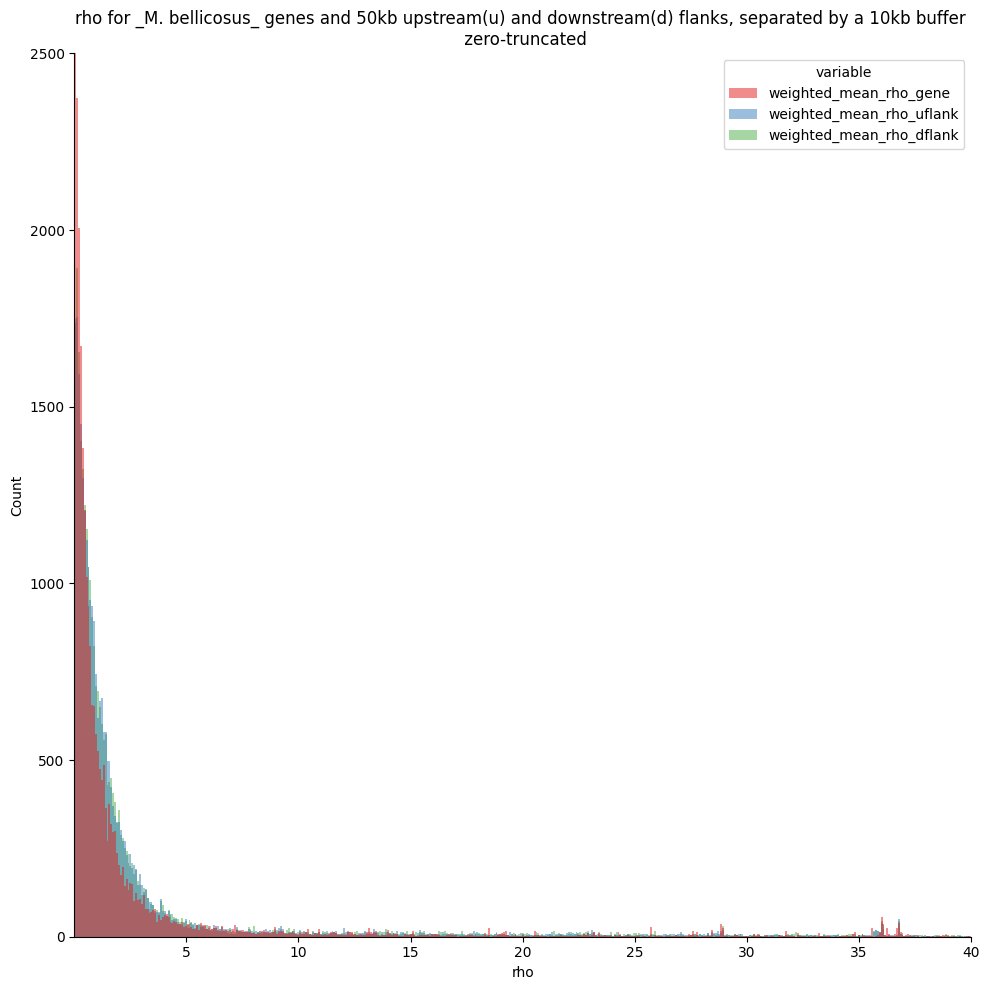

In [14]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
sns.histplot(data=rho_chunks_dfmelt, x="value", hue="variable",linewidth=0, palette = ['#e41a1c','#377eb8','#4daf4a'])

ax.set_xlim(0.01,40)
ax.set_ylim(0.00,2500)
ax.set_title('rho for _M. bellicosus_ genes and 50kb upstream(u) and downstream(d) flanks, separated by a 10kb buffer \n zero-truncated')
ax.set_xlabel('rho')

sns.despine()
plt.tight_layout()
plt.savefig('./figures/20230810_Mbel_rho_dist_gene_and_flanks50kb_buffer10kb.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_rho_dist_gene_and_flanks50kb_buffer10kb.svg',bbox_inches='tight')
plt.show()

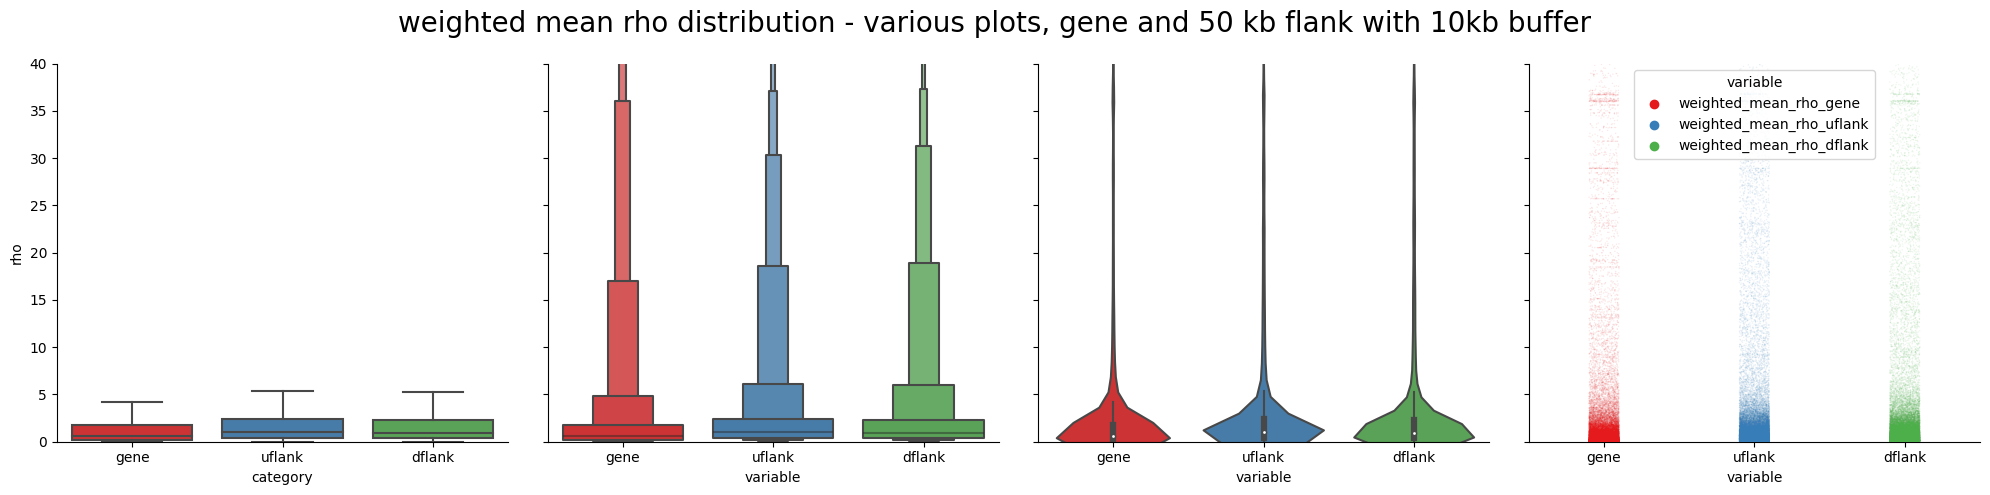

In [29]:
fig, (ax, ax1, ax2, ax3) = plt.subplots(ncols=4, nrows=1, figsize=(20,5), sharey=True, sharex=True)
sns.boxplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax, fliersize=0)
sns.boxenplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax1)
sns.violinplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax2)
sns.stripplot(data=rho_chunks_dfmelt, y="value",x='variable', hue='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax3, alpha=0.1, s=1)


ax.set_xticklabels(['gene', 'uflank', 'dflank'])
ax.set_ylabel('rho')
ax1.set_ylabel(' ')
ax2.set_ylabel(' ')
ax3.set_ylabel(' ')
ax.set_xlabel('category')
ax.set_ylim(0,40)

fig.suptitle('weighted mean rho distribution - various plots, gene and 50 kb flank with 10kb buffer', size=20)
sns.despine()
plt.tight_layout()
plt.savefig('./figures/20230810_Mbel_rho_boxplot_and_alternatives_gene_and_flanks50kb_buffer10kb.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_rho_boxplot_and_alternatives_gene_and_flanks50kb_buffer10kb.svg',bbox_inches='tight')
plt.show()

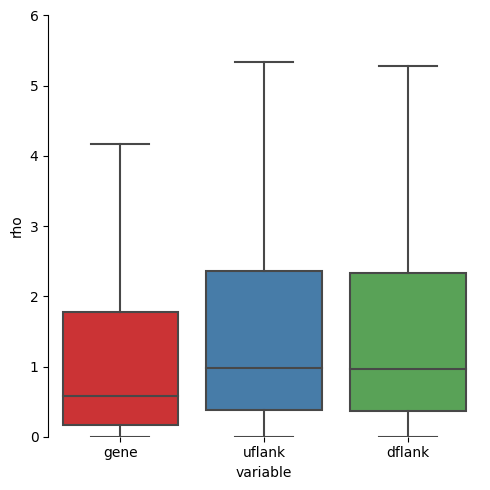

In [30]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
sns.boxplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax, fliersize=0)


ax.set_xticklabels(['gene', 'uflank', 'dflank'])
ax.set_ylabel('rho')

ax.set_ylim(0,6)

plt.tight_layout()
sns.despine(bottom=True)
plt.savefig('./figures/20230810_Mbel_rho_boxplot_no_outlier_gene_and_flanks50kb_buffer10kb.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_rho_boxplot_no_outlier_gene_and_flanks50kb_buffer10kb.svg',bbox_inches='tight')
plt.show()

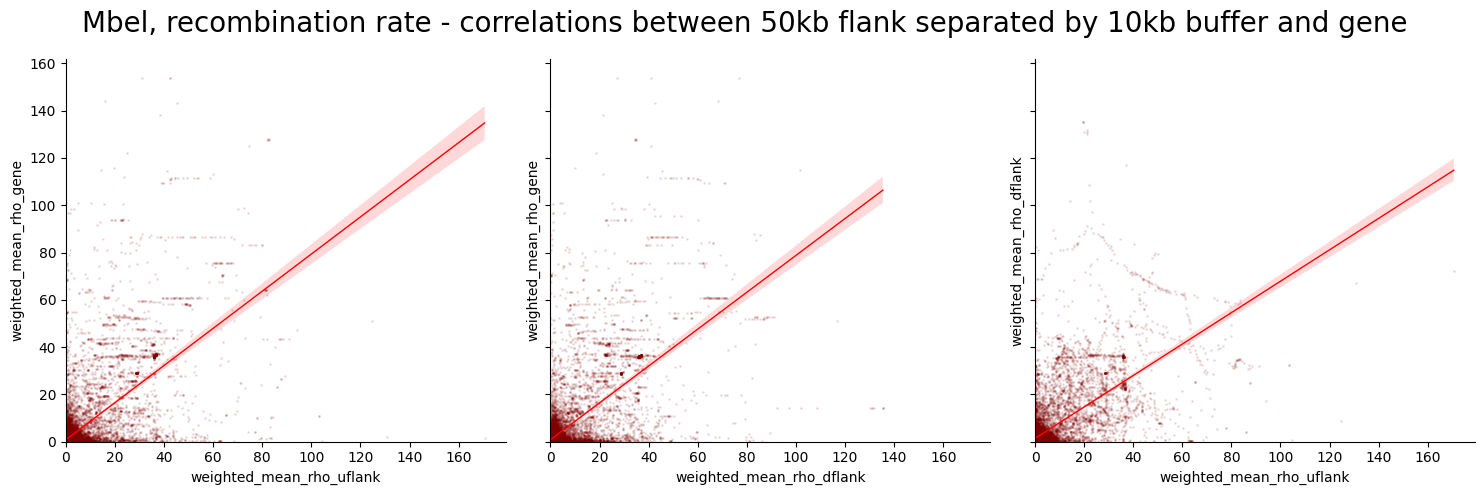

In [32]:
fig, (ax, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(15,5), sharey=True, sharex=True)

sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_uflank", y="weighted_mean_rho_gene", ax=ax, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )
sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_dflank", y="weighted_mean_rho_gene", ax=ax1, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )
sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_uflank", y="weighted_mean_rho_dflank", ax=ax2, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )

ax.set_xlim(0,)
ax.set_ylim(0,)

fig.suptitle("Mbel, recombination rate - correlations between 50kb flank separated by 10kb buffer and gene", size=20)
sns.despine()
plt.tight_layout()
plt.savefig('./figures/20230810_Mbel_rho_correlations_between_gene_and_flanks50kb_buffer10kb.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_rho_correlations_between_gene_and_flanks50kb_buffer10kb.svg',bbox_inches='tight')

plt.show()

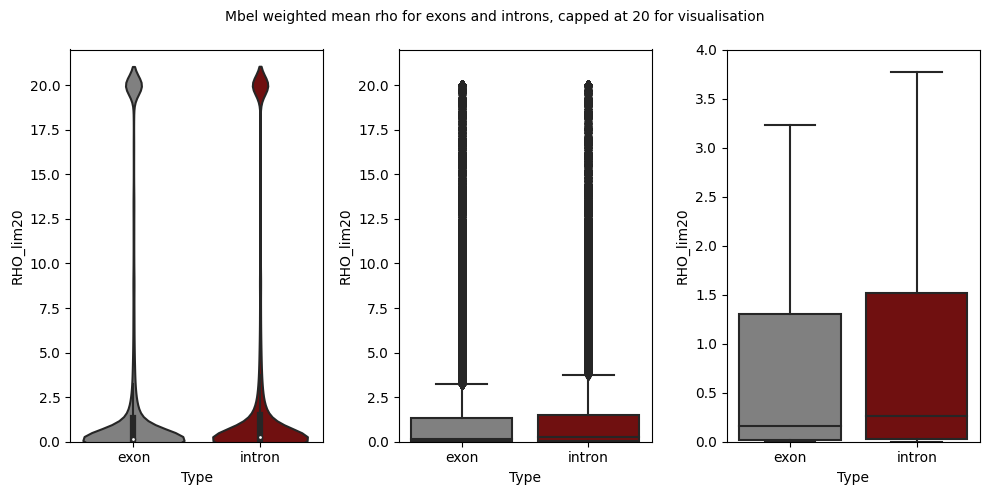

In [45]:
rho_chunks_exin_df['RHO_lim20']  = [i if i<20 else 20 for i in rho_chunks_exin_df['RHO']]

fig, (ax, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(10,5), sharey=False)

sns.violinplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax, palette=['grey', 'maroon'])
sns.boxplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax1,palette=['grey', 'maroon'])
sns.boxplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax2, fliersize=0,palette=['grey', 'maroon'])

ax.set_ylim(0,22)
ax1.set_ylim(0,22)
fig.suptitle('Mbel weighted mean rho for exons and introns, capped at 20 for visualisation', size=10)
ax2.set_ylim(0,4)
plt.tight_layout()
plt.savefig('./figures/20230810_Mbel_rho_boxplot_and_alternatives_exon_and_introns.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_rho_boxplot_and_alternatives_exon_and_introns.svg',bbox_inches='tight')
plt.show()

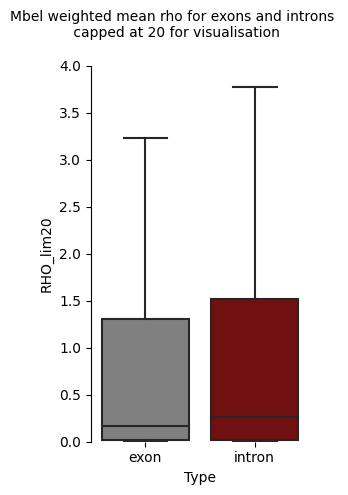

In [48]:
rho_chunks_exin_df['RHO_lim20']  = [i if i<20 else 20 for i in rho_chunks_exin_df['RHO']]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3,5), sharey=False)


sns.boxplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax, fliersize=0,palette=['grey', 'maroon'])

ax.set_ylim(0,4)

fig.suptitle('Mbel weighted mean rho for exons and introns \n capped at 20 for visualisation', size=10)

plt.tight_layout()
plt.savefig('./figures/20230810_Mbel_rho_boxplot_no_outliers_exon_and_introns.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_rho_boxplot_no_outliers_exon_and_introns.svg',bbox_inches='tight')
sns.despine(bottom=True)
plt.show()

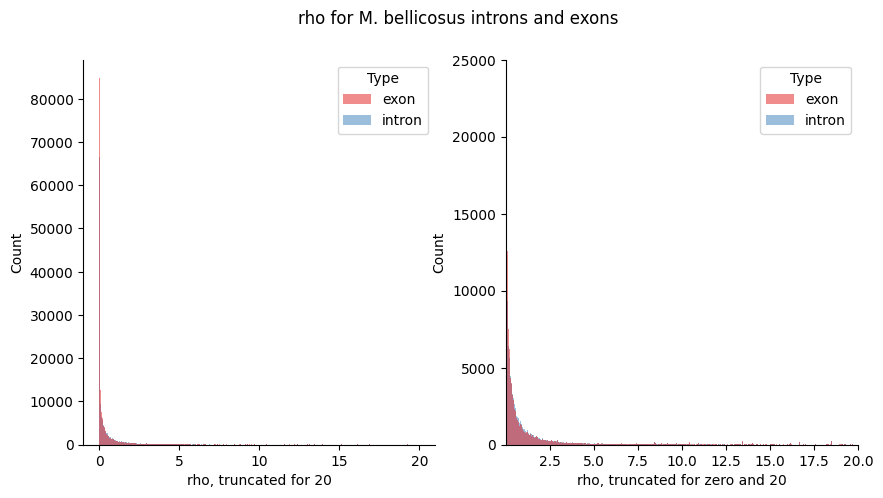

In [53]:
fig, (ax, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.histplot(data=rho_chunks_exin_df, x="RHO_lim20", hue="Type",linewidth=0, palette = ['#e41a1c','#377eb8'] ,ax=ax)
#x.set_xlim(0,2)
fig.suptitle('rho for M. bellicosus introns and exons')
ax.set_xlabel('rho, truncated for 20')

sns.histplot(data=rho_chunks_exin_df, x="RHO_lim20", hue="Type",linewidth=0, palette = ['#e41a1c','#377eb8'] ,ax=ax1)
ax1.set_xlim(0.001,20)
ax1.set_ylim(0,25000)
ax1.set_xlabel('rho, truncated for zero and 20')

plt.savefig('./figures/20230810_Mbel_rho_dist_exon_and_introns.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_rho_dist_exon_and_introns.svg',bbox_inches='tight')
sns.despine()
plt.show()

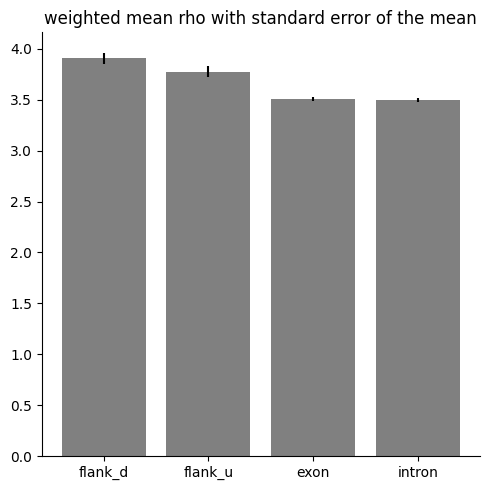

In [55]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), sharey=True)
ax.bar(height = [3.909249,3.777496,3.508157,3.498127 ], x= ['flank_d', 'flank_u', 'exon', 'intron'], yerr = [0.054706,0.053719,0.021512,0.022177], color='grey')
#ax1.bar(height = [3.909249,3.909249,3.508157,3.498127 ], x= ['flank_d', 'flank_u', 'exon', 'intron'], yerr = [11.521898,11.547933,10.836931,10.512917], color='grey')

ax.set_title("weighted mean rho with standard error of the mean")
#ax1.set_title("weighted mean rho with standard deviation")
sns.despine()
plt.tight_layout()
ax.set_ylim(0,)
plt.savefig('./figures/20230810_Mbel_rho_barplot_with_sem_50kb_flank_10kbbuffer_and_exon_and_introns.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_rho_barplot_with_sem_50kb_flank_10kbbuffer_and_exon_and_introns.svg',bbox_inches='tight')

plt.show()

In [58]:
fd = rho_chunks_dfmelt.loc[rho_chunks_dfmelt.variable =='weighted_mean_rho_dflank' ]['value'].dropna()
fu = rho_chunks_dfmelt.loc[rho_chunks_dfmelt.variable =='weighted_mean_rho_uflank' ]['value'].dropna()
ex = rho_chunks_exin_df.loc[rho_chunks_exin_df.Type =='exon']['RHO'].dropna()
intr = rho_chunks_exin_df.loc[rho_chunks_exin_df.Type =='intron']['RHO'].dropna()

thsd = scipy.stats.tukey_hsd(fd, fu, ex, intr)

print(thsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.028     0.989    -0.197     0.253
 (0 - 2)      0.401     0.000     0.233     0.569
 (0 - 3)      0.411     0.000     0.242     0.580
 (1 - 0)     -0.028     0.989    -0.253     0.197
 (1 - 2)      0.373     0.000     0.205     0.541
 (1 - 3)      0.383     0.000     0.214     0.552
 (2 - 0)     -0.401     0.000    -0.569    -0.233
 (2 - 1)     -0.373     0.000    -0.541    -0.205
 (2 - 3)      0.010     0.988    -0.068     0.088
 (3 - 0)     -0.411     0.000    -0.580    -0.242
 (3 - 1)     -0.383     0.000    -0.552    -0.214
 (3 - 2)     -0.010     0.988    -0.088     0.068



# Csec - Rho

## load data

In [24]:
#load data
rho_chunks_df= pd.read_csv('./Csec/20230810_Csec_rho_per_gene_and_50kbflank_with_10kbbuffer.tsv', sep='\t')
rho_chunks_dfmelt = rho_chunks_df.melt(id_vars=['idstring', 'scaffold'], value_vars=['weighted_mean_rho_gene', 'weighted_mean_rho_uflank', 'weighted_mean_rho_dflank',] )

rho_chunks_exin_df= pd.read_csv('./Csec/rho_per_gene/20230717_Csec_rho_exons_and_introns.tsv', sep='\t', index_col=0)
rho_chunks_exin_df.columns =['scaffold', 'source', 'Type', 'start', 'stop', 'n', 'strand', 'n2',
       'idstring', 'scaffold2', 'RHO']
rho_chunks_exin_df.RHO = rho_chunks_exin_df.RHO.replace('no_overlap_bin', np.nan).astype(float)

## plot

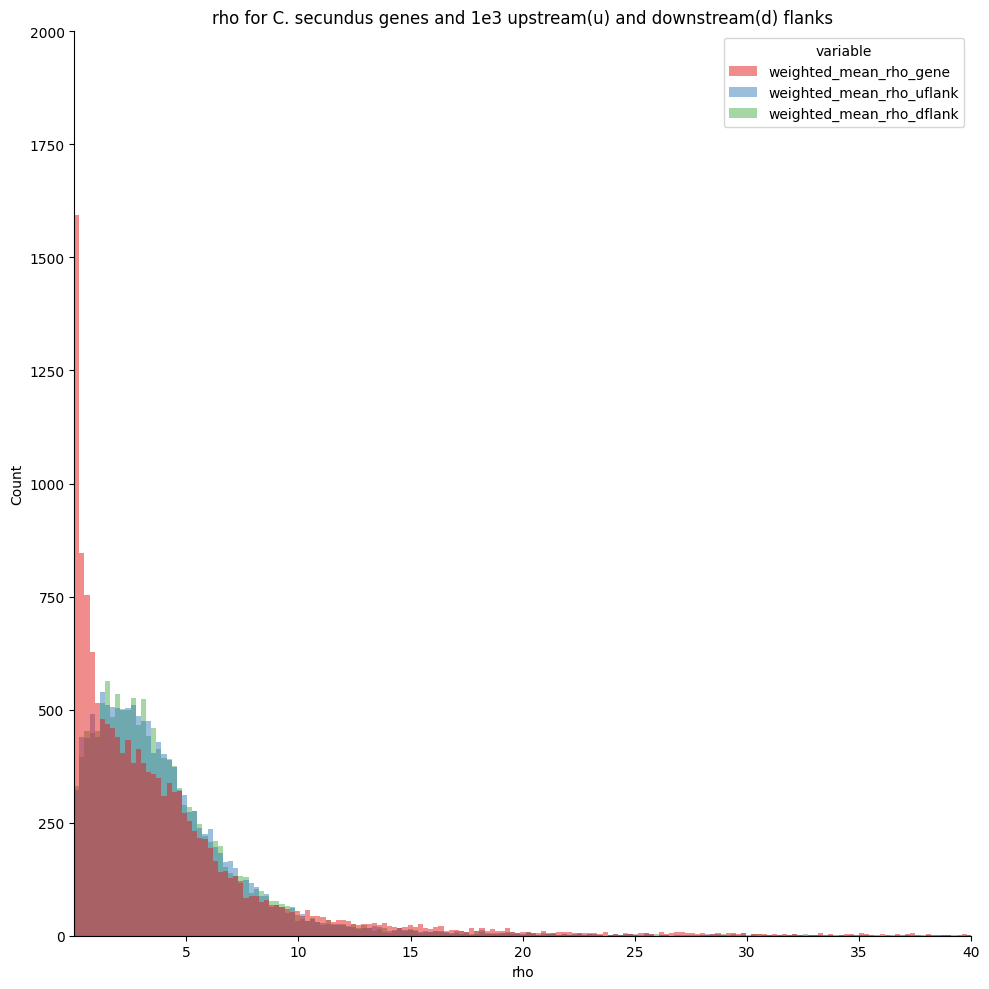

In [97]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
sns.histplot(data=rho_chunks_dfmelt, x="value", hue="variable",linewidth=0, palette = ['#e41a1c','#377eb8','#4daf4a'])

ax.set_xlim(0.01,40)
ax.set_ylim(0.00,2000)
ax.set_title('rho for C. secundus genes and 1e3 upstream(u) and downstream(d) flanks')
ax.set_xlabel('rho')

sns.despine()
plt.tight_layout()
plt.savefig('./figures/20230810_Csec_rho_dist_gene_and_flanks50kb_buffer10kb.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Csec_rho_dist_gene_and_flanks50kb_buffer10kb.svg',bbox_inches='tight')
plt.show()

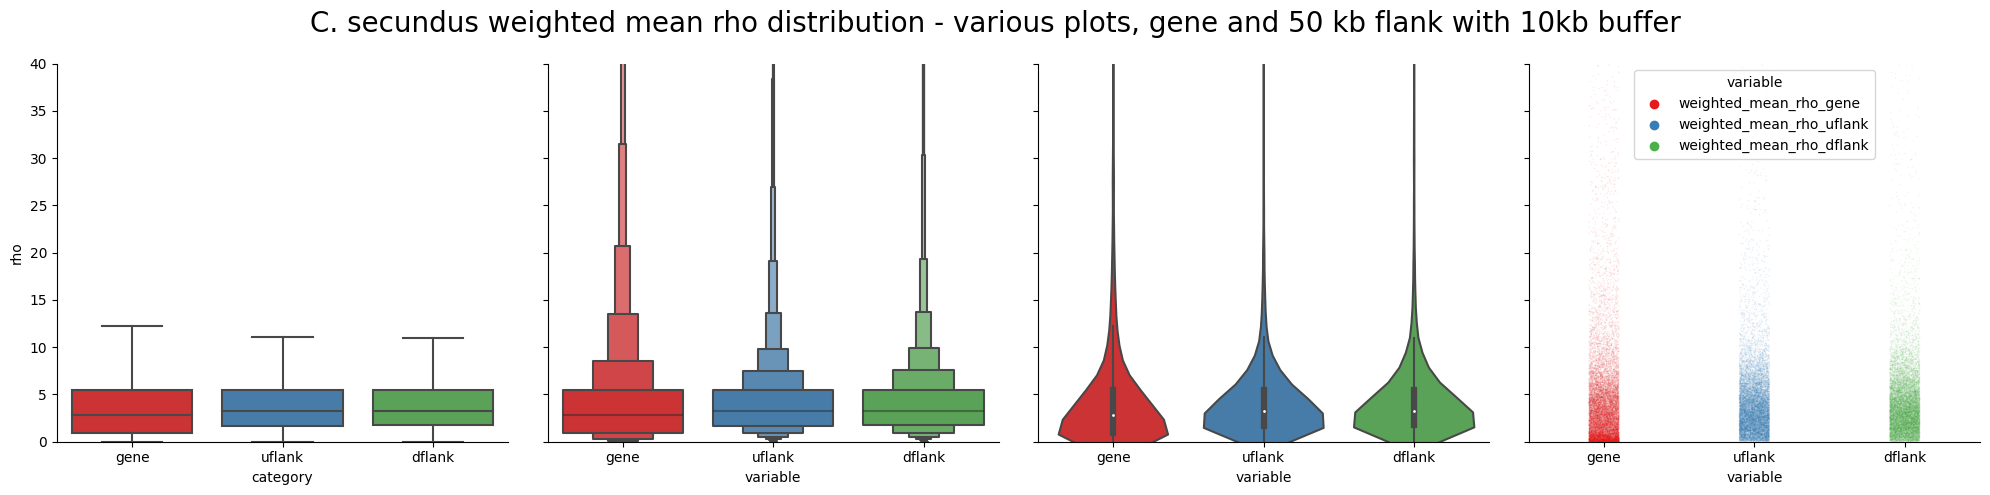

In [98]:
fig, (ax, ax1, ax2, ax3) = plt.subplots(ncols=4, nrows=1, figsize=(20,5), sharey=True, sharex=True)
sns.boxplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax, fliersize=0)
sns.boxenplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax1)
sns.violinplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax2)
sns.stripplot(data=rho_chunks_dfmelt, y="value",x='variable', hue='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax3, alpha=0.1, s=1)


ax.set_xticklabels(['gene', 'uflank', 'dflank'])
ax.set_ylabel('rho')
ax1.set_ylabel(' ')
ax2.set_ylabel(' ')
ax3.set_ylabel(' ')
ax.set_xlabel('category')
ax.set_ylim(0,40)

fig.suptitle('C. secundus weighted mean rho distribution - various plots, gene and 50 kb flank with 10kb buffer', size=20)
sns.despine()
plt.tight_layout()
plt.savefig('./figures/20230810_Csec_rho_boxplot_and_alternatives_gene_and_flanks50kb_buffer10kb.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Csec_rho_boxplot_and_alternatives_gene_and_flanks50kb_buffer10kb.svg',bbox_inches='tight')
plt.show()

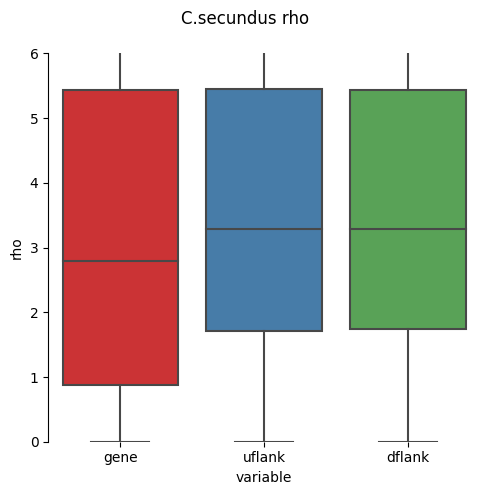

In [100]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
sns.boxplot(data=rho_chunks_dfmelt, y="value",x='variable', palette = ['#e41a1c','#377eb8','#4daf4a'], ax=ax, fliersize=0)


ax.set_xticklabels(['gene', 'uflank', 'dflank'])
ax.set_ylabel('rho')
fig.suptitle('C.secundus rho')
ax.set_ylim(0,6)

plt.tight_layout()
sns.despine(bottom=True)
plt.savefig('./figures/20230810_Csec_rho_boxplot_no_outlier_gene_and_flanks50kb_buffer10kb.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Csec_rho_boxplot_no_outlier_gene_and_flanks50kb_buffer10kb.svg',bbox_inches='tight')
plt.show()

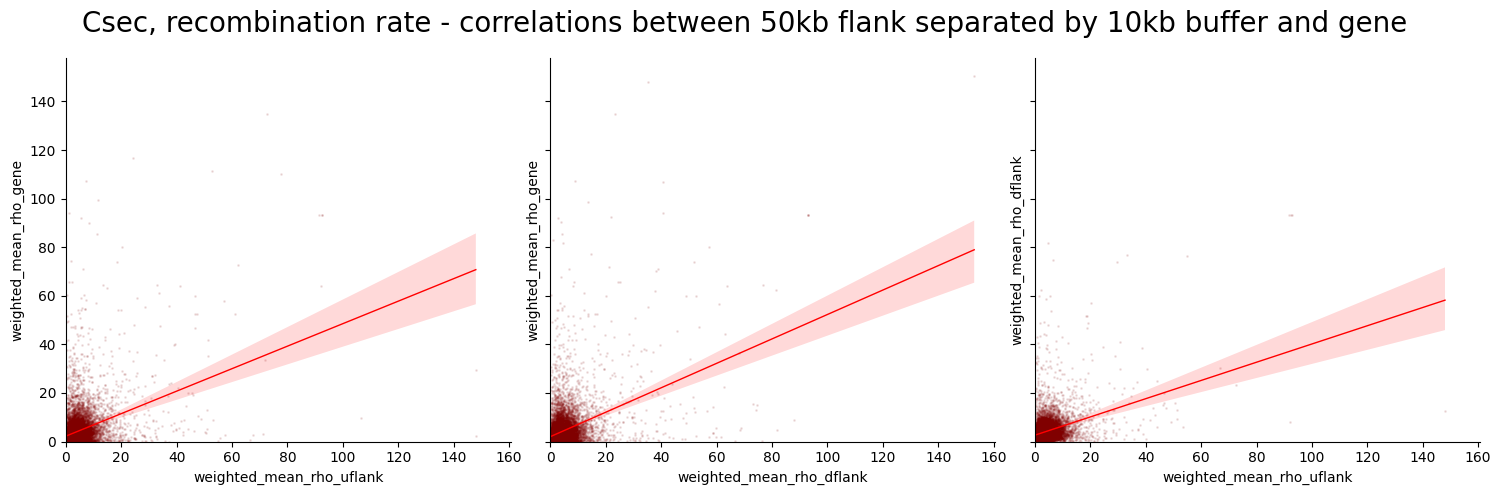

In [101]:
fig, (ax, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(15,5), sharey=True, sharex=True)

sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_uflank", y="weighted_mean_rho_gene", ax=ax, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )
sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_dflank", y="weighted_mean_rho_gene", ax=ax1, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )
sns.regplot(data=rho_chunks_df, x="weighted_mean_rho_uflank", y="weighted_mean_rho_dflank", ax=ax2, line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'maroon'} )

ax.set_xlim(0,)
ax.set_ylim(0,)

fig.suptitle("Csec, recombination rate - correlations between 50kb flank separated by 10kb buffer and gene", size=20)
sns.despine()
plt.tight_layout()
plt.savefig('./figures/20230810_Csec_rho_correlations_between_gene_and_flanks50kb_buffer10kb.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Csec_rho_correlations_between_gene_and_flanks50kb_buffer10kb.svg',bbox_inches='tight')

plt.show()

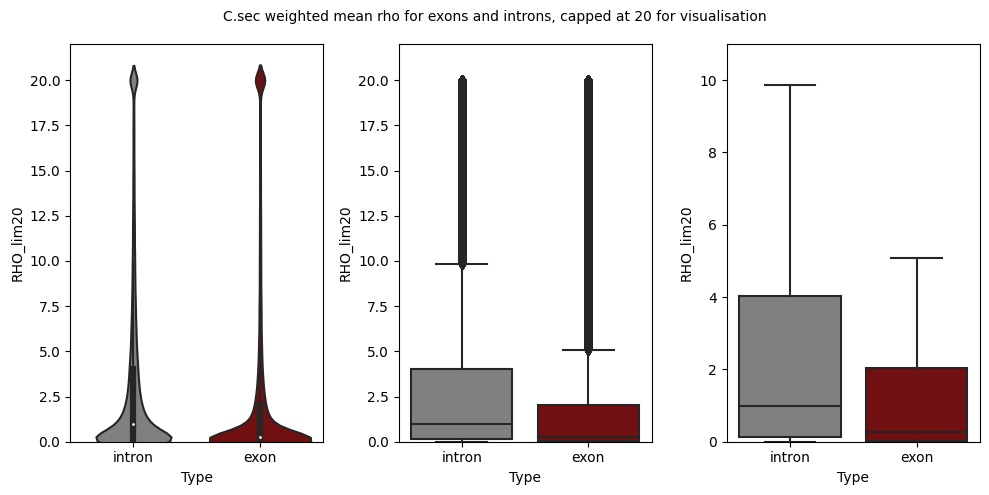

In [106]:
rho_chunks_exin_df['RHO_lim20']  = [i if i<20 else 20 for i in rho_chunks_exin_df['RHO']]

fig, (ax, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(10,5), sharey=False)

sns.violinplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax, palette=['grey', 'maroon'])
sns.boxplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax1,palette=['grey', 'maroon'])
sns.boxplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax2, fliersize=0,palette=['grey', 'maroon'])

ax.set_ylim(0,22)
ax1.set_ylim(0,22)
fig.suptitle('C.sec weighted mean rho for exons and introns, capped at 20 for visualisation', size=10)
ax2.set_ylim(0,11)
plt.tight_layout()
plt.savefig('./figures/20230810_Csec_rho_boxplot_and_alternatives_exon_and_introns.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Csec_rho_boxplot_and_alternatives_exon_and_introns.svg',bbox_inches='tight')
plt.show()

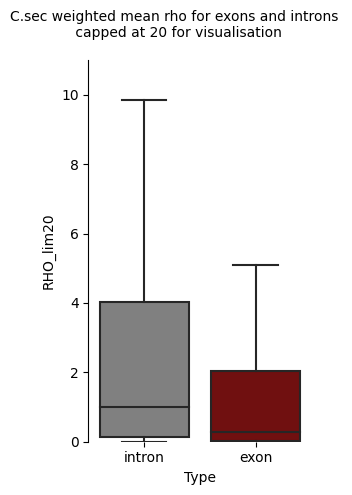

In [107]:
rho_chunks_exin_df['RHO_lim20']  = [i if i<20 else 20 for i in rho_chunks_exin_df['RHO']]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(3,5), sharey=False)

sns.boxplot(data=rho_chunks_exin_df, x='Type', y='RHO_lim20', ax=ax, fliersize=0,palette=['grey', 'maroon'])

ax.set_ylim(0,11)

fig.suptitle('C.sec weighted mean rho for exons and introns \n capped at 20 for visualisation', size=10)

plt.tight_layout()
plt.savefig('./figures/20230810_Csec_rho_boxplot_no_outliers_exon_and_introns.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Csec_rho_boxplot_no_outliers_exon_and_introns.svg',bbox_inches='tight')
sns.despine(bottom=True)
plt.show()

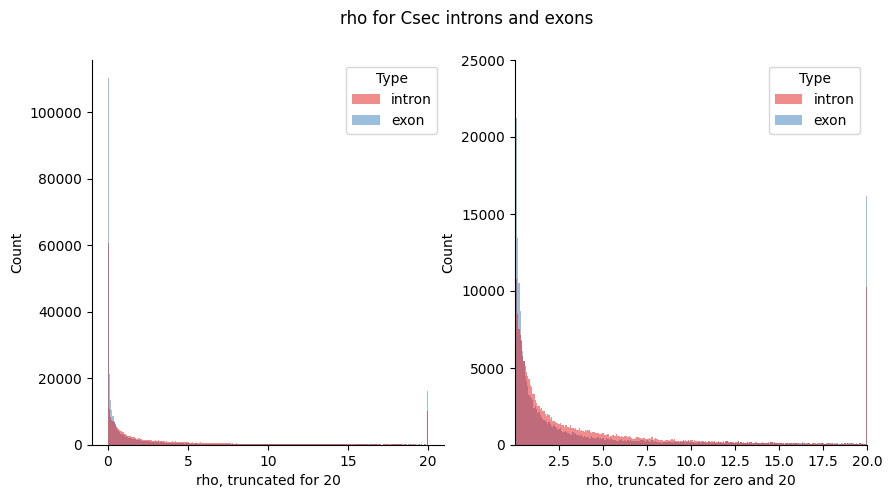

In [108]:
fig, (ax, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.histplot(data=rho_chunks_exin_df, x="RHO_lim20", hue="Type",linewidth=0, palette = ['#e41a1c','#377eb8'] ,ax=ax)
#x.set_xlim(0,2)
fig.suptitle('rho for Csec introns and exons')
ax.set_xlabel('rho, truncated for 20')

sns.histplot(data=rho_chunks_exin_df, x="RHO_lim20", hue="Type",linewidth=0, palette = ['#e41a1c','#377eb8'] ,ax=ax1)
ax1.set_xlim(0.001,20)
ax1.set_ylim(0,25000)
ax1.set_xlabel('rho, truncated for zero and 20')

plt.savefig('./figures/20230810_Csec_rho_dist_exon_and_introns.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Csec_rho_dist_exon_and_introns.svg',bbox_inches='tight')
sns.despine()
plt.show()

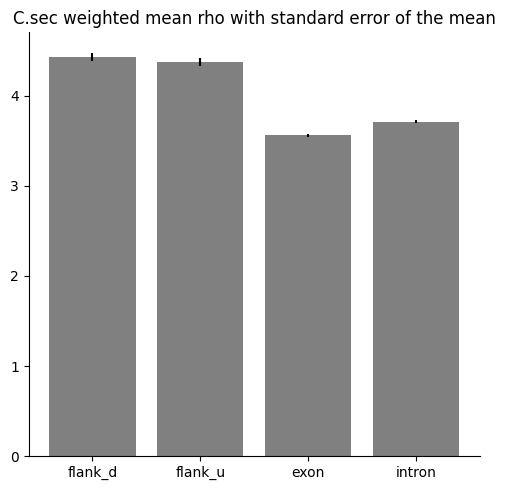

In [189]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), sharey=True)
ax.bar(height = [4.432077,4.373883, 3.558582,3.711299 ], x= ['flank_d', 'flank_u', 'exon', 'intron'], yerr = [0.046994,0.045769,0.017638,0.014387], color='grey')
#ax1.bar(height = [4.457875,4.463503, 3.558582,3.711299 ], x= ['flank_d', 'flank_u', 'exon', 'intron'], yerr = [9.954115,10.160580,9.801586,7.556328], color='grey')

ax.set_title("C.sec weighted mean rho with standard error of the mean")

sns.despine()
plt.tight_layout()
ax.set_ylim(0,)

plt.savefig('./figures/20230810_Csec_rho_barplot_with_sem_50kb_flank_10kbbuffer_and_exon_and_introns.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Csec_rho_barplot_with_sem_50kb_flank_10kbbuffer_and_exon_and_introns.svg',bbox_inches='tight')

plt.show()

In [113]:
fd = rho_chunks_dfmelt.loc[rho_chunks_dfmelt.variable =='weighted_mean_rho_dflank' ]['value'].dropna()
fu = rho_chunks_dfmelt.loc[rho_chunks_dfmelt.variable =='weighted_mean_rho_uflank' ]['value'].dropna()
ex = rho_chunks_exin_df.loc[rho_chunks_exin_df.Type =='exon']['RHO'].dropna()
intr = rho_chunks_exin_df.loc[rho_chunks_exin_df.Type =='intron']['RHO'].dropna()

thsd = scipy.stats.tukey_hsd(fd, fu, ex, intr)
print(thsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.058     0.945    -0.212     0.328
 (0 - 2)      0.873     0.000     0.679     1.068
 (0 - 3)      0.721     0.000     0.525     0.916
 (1 - 0)     -0.058     0.945    -0.328     0.212
 (1 - 2)      0.815     0.000     0.620     1.010
 (1 - 3)      0.663     0.000     0.467     0.858
 (2 - 0)     -0.873     0.000    -1.068    -0.679
 (2 - 1)     -0.815     0.000    -1.010    -0.620
 (2 - 3)     -0.153     0.000    -0.211    -0.094
 (3 - 0)     -0.721     0.000    -0.916    -0.525
 (3 - 1)     -0.663     0.000    -0.858    -0.467
 (3 - 2)      0.153     0.000     0.094     0.211



# Mbel-CpG

# Csec-CpG

In [23]:
Csec_CpG_gene_and_flank = pd.read_csv( './Csec/20230810_Csec_CpG_per_gene_and_50kbflank_10kbbuffer.tsv', sep='\t', index_col=0)
Csec_CpG_exon_and_intron = pd.read_csv('/proj/snic2021-23-365/private/TR_20230707/TR_20230707_per_gene_analysis/Csec/20230717_Csec_CpG_exons_and_introns.tsv', sep='\t', index_col=0)

In [37]:
rho_chunks_exin_df

,scaffold,source,Type,start,stop,n,strand,n2,idstring,scaffold2,RHO
0,,,,,,,,,,,
511495,NW_019731994.1,.,intron,416800,421167,.,+,.,Parent=rna-XM_023857401.2,NEVH01013973.1,5.475161
511496,NW_019731994.1,Gnomon,exon,421168,421270,.,+,.,ID=exon-XM_023857401.2-9;Parent=rna-XM_0238574...,NEVH01013973.1,3.832550
511498,NW_019731994.1,.,intron,421271,422203,.,+,.,Parent=rna-XM_023857401.2,NEVH01013973.1,1.480505
511499,NW_019731994.1,Gnomon,exon,422204,422499,.,+,.,ID=exon-XM_023857401.2-10;Parent=rna-XM_023857...,NEVH01013973.1,3.815746
511501,NW_019731994.1,.,intron,422500,423379,.,+,.,Parent=rna-XM_023857401.2,NEVH01013973.1,8.133196
...,...,...,...,...,...,...,...,...,...,...,...
768548,NW_019739943.1,Gnomon,exon,1063378,1063551,.,-,.,ID=exon-XM_033754500.1-14;Parent=rna-XM_033754...,NEVH01021922.1,14.823760
768550,NW_019739943.1,.,intron,1063552,1082684,.,-,.,Parent=rna-XM_033754500.1,NEVH01021922.1,5.716653
768551,NW_019739943.1,Gnomon,exon,1082685,1082816,.,-,.,ID=exon-XM_033754500.1-13;Parent=rna-XM_033754...,NEVH01021922.1,38.055080


In [39]:
Csec_exin = pd.merge(left=Csec_CpG_exon_and_intron, right=rho_chunks_exin_df, left_on=['ID','featuretype'], right_on=['idstring','Type'])

In [40]:
# generating the intron positions with Genometools has left the IDstring somewhat sparse, only denoting parent RNA.
# here i use the richer ID-string of the exons to link parent-RNA to the genebank ID

ID_dict = {}
for i in Csec_exin.loc[Csec_exin.featuretype=='exon'].ID:
    idfields = i.split(';')
    idict = {i.split('=')[0]:i.split('=')[1] for i in idfields}
    ID_dict[idict['Parent']] = idict['Dbxref']


def extract_id(idstring, idtype = 'Dbxref', ID_dict=False):
    if ID_dict == False:
        idfields = idstring.split(';')
        idict = {i.split('=')[0]:i.split('=')[1] for i in idfields}
        return idict[idtype].split(',')[0]
    else:
        idfields = idstring.split(';')
        idict = {i.split('=')[0]:i.split('=')[1] for i in idfields}
        try:
            return idict[idtype].split(',')[0]
        except KeyError:
            return ID_dict[idict['Parent']].split(',')[0]
            

In [41]:
Csec_gene_and_flank['GeneID'] = [extract_id(i) for i in Csec_gene_and_flank.ID]

In [25]:
Csec_gene_and_flank = pd.merge(left=rho_chunks_df, right=Csec_CpG_gene_and_flank, left_on='idstring', right_on='ID')

In [42]:
Csec_exin['GeneID'] = [extract_id(i, ID_dict=ID_dict) for i in Csec_exin.ID]

In [46]:
Csec_exin.ID[0]

'ID=exon-XM_023864154.2-6;Parent=rna-XM_023864154.2;Dbxref=GeneID:111871218,Genbank:XM_023864154.2;gbkey=mRNA;gene=LOC111871218;product=uncharacterized LOC111871218%2C transcript variant X1;transcript_id=XM_023864154.2'

In [52]:
DE_data.Csec_geneName

0       Csec_G08529
1       Csec_G08558
2       Csec_G10175
3       Csec_G10405
4       Csec_G10411
           ...     
1806    Csec_G05159
1807    Csec_G05306
1808    Csec_G05317
1809    Csec_G06487
1810    Csec_G07846
Name: Csec_geneName, Length: 1811, dtype: object

In [59]:
[ str(i) for i in DE_data.Csec_geneName if str(i).startswith('Csec_G')]

['Csec_G08529',
 'Csec_G08558',
 'Csec_G10175',
 'Csec_G10405',
 'Csec_G10411',
 'Csec_G11924',
 'Csec_G11926',
 'Csec_G12414',
 'Csec_G12415',
 'Csec_G12693',
 'Csec_G12695',
 'Csec_G12698',
 'Csec_G14806',
 'Csec_G14807',
 'Csec_G15120',
 'Csec_G16260',
 'Csec_G16265',
 'Csec_G08751',
 'Csec_G17387',
 'Csec_G18162',
 'Csec_G18346',
 'Csec_G01621',
 'Csec_G01622',
 'Csec_G01623',
 'Csec_G08756',
 'Csec_G03370',
 'Csec_G03390',
 'Csec_G04781',
 'Csec_G04784',
 'Csec_G06821',
 'Csec_G06830',
 'Csec_G09368',
 'Csec_G10723',
 'Csec_G11359',
 'Csec_G11360',
 'Csec_G13267',
 'Csec_G13971',
 'Csec_G14850',
 'Csec_G16611',
 'Csec_G17079',
 'Csec_G17718',
 'Csec_G01756',
 'Csec_G01764',
 'Csec_G10951',
 'Csec_G02647',
 'Csec_G02654',
 'Csec_G02656',
 'Csec_G02661',
 'Csec_G02662',
 'Csec_G02668',
 'Csec_G02675',
 'Csec_G02676',
 'Csec_G02677',
 'Csec_G10956',
 'Csec_G03702',
 'Csec_G03708',
 'Csec_G03709',
 'Csec_G04375',
 'Csec_G04377',
 'Csec_G04382',
 'Csec_G04384',
 'Csec_G00910',
 'Csec_G

In [5]:
# generating the intron positions with Genometools has left the IDstring somewhat sparse, only denoting parent RNA.
# here i use the richer ID-string of the exons to link parent-RNA to the genebank ID

ID_dict = {}
for i in Csec_exin.loc[Csec_exin.featuretype=='exon'].ID:
    idfields = i.split(';')
    idict = {i.split('=')[0]:i.split('=')[1] for i in idfields}
    ID_dict[idict['Parent']] = idict['Dbxref']


def extract_id(idstring, idtype = 'Dbxref', ID_dict=False):
    if ID_dict == False:
        idfields = idstring.split(';')
        idict = {i.split('=')[0]:i.split('=')[1] for i in idfields}
        return idict[idtype].split(',')[0]
    else:
        idfields = idstring.split(';')
        idict = {i.split('=')[0]:i.split('=')[1] for i in idfields}
        try:
            return idict[idtype].split(',')[0]
        except KeyError:
            return ID_dict[idict['Parent']].split(',')[0]
            

In [6]:
Csec_gene_and_flank['GeneID'] = [extract_id(i) for i in Csec_gene_and_flank.ID]

In [7]:
Csec_exin['GeneID'] = [extract_id(i, ID_dict=ID_dict) for i in Csec_exin.ID]

In [8]:
# remnove superfluous columns
Csec_gene_and_flank = Csec_gene_and_flank[['scaffold', 'weighted_mean_rho_gene', 'weighted_mean_rho_uflank',
       'weighted_mean_rho_dflank', 'ID', 'gene_cpg_e',
       'gene_cpg_o', 'gene_cpg_oe', 'flank_u_cpg_e', 'flank_u_cpg_o',
       'flank_u_cpg_oe', 'flank_d_cpg_e', 'flank_d_cpg_o', 'flank_d_cpg_oe',
       'GeneID']]

In [9]:
# rename scaffold and rho columns to avoid issues down the line
Csec_exin.columns = ['featuretype', 'ID', 'gene_cpg_e', 'gene_cpg_o', 'gene_cpg_oe',
       'scaffold2', 'source', 'start', 'stop', 'n', 'strand', 'n2',
       'scaffold', 'weighted_mean_rho_gene', 'GeneID']

In [10]:
# remnove superfluous columns
Csec_exin = Csec_exin[['featuretype', 'ID', 'gene_cpg_e', 'gene_cpg_o', 'gene_cpg_oe','source', 'start', 'stop', 'n', 'strand', 'n2','scaffold', 'weighted_mean_rho_gene', 'GeneID']]

In [11]:
merged_Csec = pd.concat([Csec_gene_and_flank, Csec_exin])

In [12]:
#merged_Csec.to_csv('./20230727_Csec_rho_and_CpG_for_genes_flanking1e3_and_exons_introns.tsv', sep='\t')

# Mbel-DE

In [121]:

#Mbel
        #rho
Mbel_rho_gene_and_flank = rho_chunks_df = pd.read_csv('./Mbel/20230810_Mbel_rho_per_gene_and_50kbflank_with_10kbbuffer.tsv', sep='\t', index_col=0)
Mbel_rho_exon_and_intron =  pd.read_csv('./Mbel/20230717_Mbel_rho_exons_and_introns.tsv', sep='\t', index_col=0)
Mbel_rho_exon_and_intron.RHO = Mbel_rho_exon_and_intron.RHO.replace('no_overlap_bin', np.nan).astype(float)
        #CpG
Mbel_CpG_gene_and_flank = pd.read_csv('/proj/snic2021-23-365/private/TR_20230707/TR_20230707_per_gene_analysis/Mbel/20230717_Mbel_CpG_per_gene_and_1e3flankingregions.tsv', sep='\t',index_col=0)
Mbel_CpG_exon_and_intron = pd.read_csv('/proj/snic2021-23-365/private/TR_20230707/TR_20230707_per_gene_analysis/Mbel/20230717_Mbel_CpG_exons_and_introns.tsv', sep='\t',index_col=0)


In [122]:
Mbel_rho_gene_and_flank.columns = ['scaffold', 'weighted_mean_rho_gene', 'weighted_mean_rho_uflank',
       'weighted_mean_rho_dflank', 'ID']
Mbel_gene_and_flank = pd.merge(left=Mbel_rho_gene_and_flank, right=Mbel_CpG_gene_and_flank, left_on='ID', right_on='ID')
Mbel_exin = pd.merge(left=Mbel_CpG_exon_and_intron, right=Mbel_rho_exon_and_intron, left_on=['ID'], right_on=['ID'])

In [123]:
Mbel_exin

,ID,gene_cpg_e,gene_cpg_o,gene_cpg_oe,Scaffold,Type,Start_pos,End_pos,gene_id,RHO
0,g22731.t1.intron6,21.374046,0,0.000000,scaffold6,intron,27962678,27963464,g22731.t1,0.098135
1,g22731.t1.exon7,16.271186,6,0.368750,scaffold6,exon,27963465,27963760,g22731.t1,0.101440
2,g22731.t1.intron7,37.698344,5,0.132632,scaffold6,intron,27963761,27964908,g22731.t1,0.231845
3,g22731.t1.exon8,17.885350,6,0.335470,scaffold6,exon,27964909,27965223,g22731.t1,0.308049
4,g22731.t1.intron8,7.959302,2,0.251278,scaffold6,intron,27965224,27965568,g22731.t1,0.221740
...,...,...,...,...,...,...,...,...,...,...
500942,g10458.t1.exon2,5.008696,1,0.199653,scaffold62,exon,4364503,4364618,g10458.t1,NaN
500943,g10458.t1.intron2,87.118243,50,0.573933,scaffold62,intron,4364619,4366987,g10458.t1,NaN
500944,g10458.t1.exon3,8.888889,6,0.675000,scaffold62,exon,4366988,4367168,g10458.t1,NaN
500945,g10458.t1.intron3,58.456164,18,0.307923,scaffold62,intron,4367169,4368629,g10458.t1,NaN


In [124]:
Mbel_exin.columns = ['ID', 'gene_cpg_e', 'gene_cpg_o', 'gene_cpg_oe', 'scaffold', 'featuretype',
       'Start_pos', 'End_pos', 'GeneID', 'weighted_mean_rho_gene']

In [125]:
Mbel_gene_and_flank.columns = ['scaffold', 'weighted_mean_rho_gene', 'weighted_mean_rho_uflank',
       'weighted_mean_rho_dflank', 'GeneID', 'gene_cpg_e', 'gene_cpg_o',
       'gene_cpg_oe', 'flank_u_cpg_e', 'flank_u_cpg_o', 'flank_u_cpg_oe',
       'flank_d_cpg_e', 'flank_d_cpg_o', 'flank_d_cpg_oe']

In [126]:
merged_Mbel = pd.concat([Mbel_exin,Mbel_gene_and_flank])
merged_Mbel.featuretype = merged_Mbel.featuretype.replace(np.nan, 'gene')

In [128]:
DEdf = pd.read_csv('./Mbel/20230727_DE_table_with_orthologues_from_elsner2017.tsv', sep='\t', index_col=0)
DEdf = DEdf.dropna(subset=['sgo'])
DEdf.columns = ['GeneID_Mnat', 'DE', 'DE_royal', 'sgo', 'sgo_mbel', 'sgo_mnat',
       'king_upregulated_vs_queen', 'majorworker_upregulated_vs_king',
       'majorworker_upregulated_vs_queen', 'queen_upregulated_vs_king',
       'queen_upregulated_vs_majorworker', 'king_upregulated_vs_majorworker',
       'minorworker_upregulated_vs_majorworker',
       'king_upregulated_vs_minorworker', 'minorworker_upregulated_vs_king',
       'majorworker_upregulated_vs_minorworker',
       'queen_upregulated_vs_minorworker', 'minorworker_upregulated_vs_queen',
       'orthologues']
DE_sgo = DEdf.loc[DEdf.sgo==True]
DE_Mbel = merged_Mbel.merge(DE_sgo, left_on='GeneID', right_on='orthologues')
DE_Mbel = DE_Mbel.replace('no_overlap_bin', np.nan)
DE_Mbel.weighted_mean_rho_gene = DE_Mbel.weighted_mean_rho_gene.astype(float)

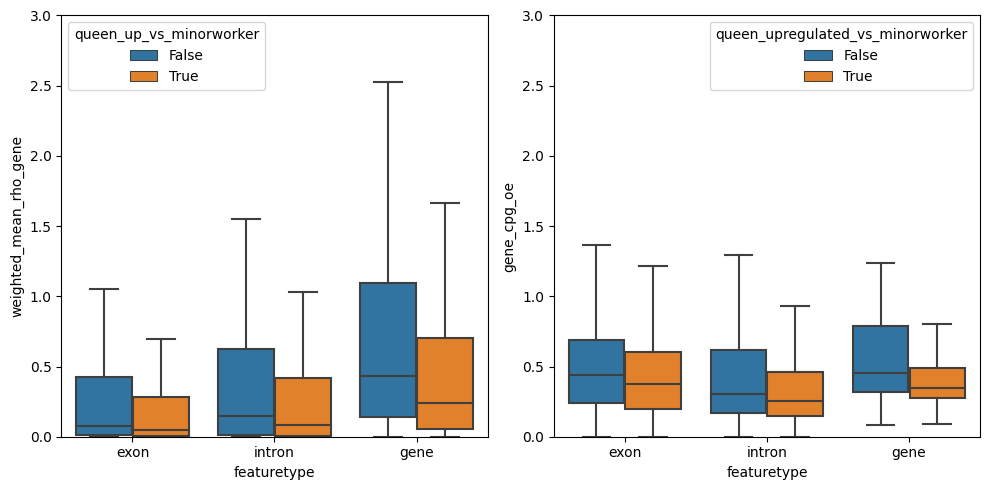

In [129]:
fig, (ax, ax1) = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

sns.boxplot(data=DE_Mbel,y='weighted_mean_rho_gene', x='featuretype', hue='queen_upregulated_vs_minorworker', dodge=True, fliersize=0, ax=ax) 

sns.boxplot(data=DE_Mbel,y='gene_cpg_oe', x='featuretype', hue='queen_upregulated_vs_minorworker', dodge=True, fliersize=0, ax=ax1) 

ax.set_ylim(0,3)
ax1.set_ylim(0,3)
ax.legend(title='queen_up_vs_minorworker', loc='upper left')

plt.tight_layout()
plt.show()

In [134]:
DEtypes = ['DE', 'DE_royal','king_upregulated_vs_queen', 'majorworker_upregulated_vs_king',
       'majorworker_upregulated_vs_queen', 'queen_upregulated_vs_king',
       'queen_upregulated_vs_majorworker', 'king_upregulated_vs_majorworker',
       'minorworker_upregulated_vs_majorworker',
       'king_upregulated_vs_minorworker', 'minorworker_upregulated_vs_king',
       'majorworker_upregulated_vs_minorworker',
       'queen_upregulated_vs_minorworker', 'minorworker_upregulated_vs_queen',
       ]

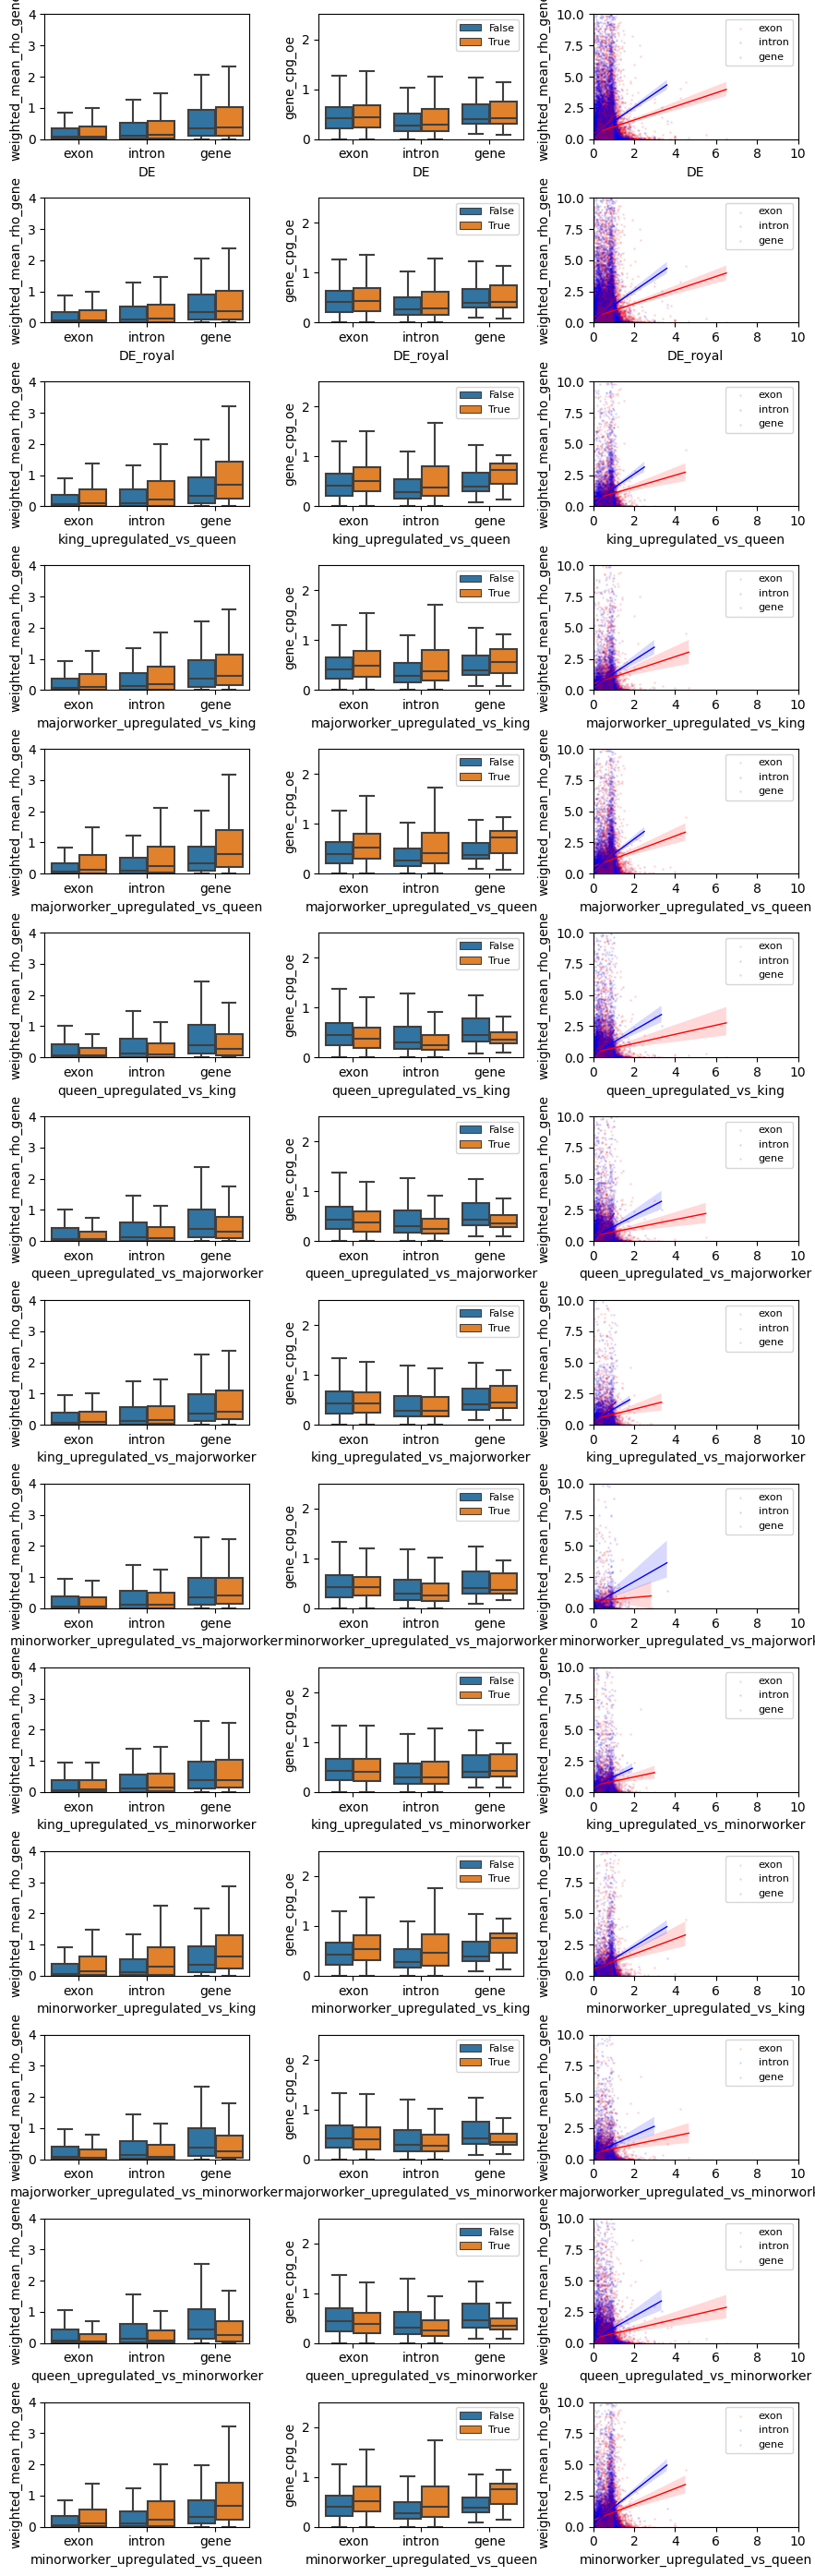

In [194]:
fig, axes = plt.subplots(ncols=3, nrows=14, figsize=(9, 28), sharex=False, sharey='col')
for i, k  in enumerate(DEtypes):
    sns.boxplot(data=DE_Mbel,y='weighted_mean_rho_gene', x='featuretype', hue=k, dodge=True, fliersize=0, ax=axes[i,0])
    sns.boxplot(data=DE_Mbel,y='gene_cpg_oe', x='featuretype', hue=k, dodge=True, fliersize=0, ax=axes[i,1]) 
    sns.regplot(data=DE_Mbel.loc[DE_Mbel[k]==True].loc[DE_Mbel['featuretype']=='exon'], x='gene_cpg_oe', y='weighted_mean_rho_gene', ax=axes[i,2], line_kws={'color':'red', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'red'}, label='exon')
    sns.regplot(data=DE_Mbel.loc[DE_Mbel[k]==True].loc[DE_Mbel['featuretype']=='intron'], x='gene_cpg_oe', y='weighted_mean_rho_gene', ax=axes[i,2], line_kws={'color':'blue', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'blue'}, label='intron')
    sns.regplot(data=DE_Mbel.loc[DE_Mbel[k]==True].loc[DE_Mbel['featuretype']=='gene'], x='gene_cpg_oe', y='weighted_mean_rho_gene', ax=axes[i,2], line_kws={'color':'purple', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'purple'}, label='gene')

    axes[i,1].legend(fontsize=8)
    axes[i,0].get_legend().remove()
    axes[i,0].set_ylim(0,4)
    axes[i,1].set_ylim(0,2.5)
    axes[i,0].set_xlabel(k)
    axes[i,1].set_xlabel(k)
    axes[i,2].set_xlabel(k)
    axes[i,2].set_ylim(0,10)
    axes[i,2].set_xlim(0,10)
    axes[i,2].legend(fontsize=8)
plt.savefig('./figures/20230810_Mbel_DE_panel.png',bbox_inches='tight')
plt.savefig('./figures/20230810_Mbel_DE_panel.svg',bbox_inches='tight')
plt.tight_layout()
plt.show()

In [144]:
axes.shape

(14, 2)

In [168]:
DE_Mbel

,ID,gene_cpg_e,gene_cpg_o,gene_cpg_oe,scaffold,featuretype,Start_pos,End_pos,GeneID,weighted_mean_rho_gene,...,queen_upregulated_vs_king,queen_upregulated_vs_majorworker,king_upregulated_vs_majorworker,minorworker_upregulated_vs_majorworker,king_upregulated_vs_minorworker,minorworker_upregulated_vs_king,majorworker_upregulated_vs_minorworker,queen_upregulated_vs_minorworker,minorworker_upregulated_vs_queen,orthologues
0,g4861.t1.exon1,0.857143,0,0.000000,scaffold5,exon,17622247.0,17622261.0,g4861.t1,2.278240,...,True,True,False,False,True,False,True,True,False,g4861.t1
1,g4861.t1.intron1,125.690391,86,0.684221,scaffold5,intron,17622262.0,17625634.0,g4861.t1,1.652539,...,True,True,False,False,True,False,True,True,False,g4861.t1
2,g4861.t1.exon2,6.967742,1,0.143519,scaffold5,exon,17625635.0,17625790.0,g4861.t1,0.010810,...,True,True,False,False,True,False,True,True,False,g4861.t1
3,g4861.t1.intron2,38.965517,9,0.230973,scaffold5,intron,17625791.0,17626951.0,g4861.t1,0.008107,...,True,True,False,False,True,False,True,True,False,g4861.t1
4,g4861.t1.exon3,5.657143,1,0.176768,scaffold5,exon,17626952.0,17627057.0,g4861.t1,0.006560,...,True,True,False,False,True,False,True,True,False,g4861.t1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95160,g2881.t1.intron8,26.697303,6,0.224742,scaffold11,intron,28563531.0,28564532.0,g2881.t1,1.625669,...,False,False,False,False,False,False,False,False,False,g2881.t1
95161,g2881.t1.exon9,4.413043,0,0.000000,scaffold11,exon,28564533.0,28564625.0,g2881.t1,1.808020,...,False,False,False,False,False,False,False,False,False,g2881.t1
95162,g2881.t1.intron9,55.170732,18,0.326260,scaffold11,intron,28564626.0,28566676.0,g2881.t1,0.292779,...,False,False,False,False,False,False,False,False,False,g2881.t1
95163,g2881.t1.exon10,4.301205,3,0.697479,scaffold11,exon,28566677.0,28566760.0,g2881.t1,0.042660,...,False,False,False,False,False,False,False,False,False,g2881.t1


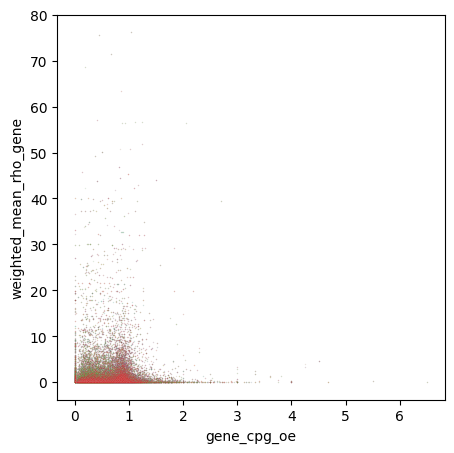

In [177]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), sharex=False, sharey='col')

for i, k  in enumerate(DEtypes):
    sns.scatterplot(data=DE_Mbel.loc[DE_Mbel[k]==True], x='gene_cpg_oe', y='weighted_mean_rho_gene', ax=ax, alpha=0.1, s=1)

In [ ]:
?sns.regplot

In [4]:
cpg_chunks_df = pd.read_csv('./Mbel/20230811_Mbel_CpG_per_gene_and_5okbflank_and_10kb_buffer_18batchmiss.tsv', sep='\t')
cpg_chunks_df_melt = cpg_chunks_df.melt(id_vars=['ID'], value_vars=['gene_cpg_e', 'gene_cpg_o', 'gene_cpg_oe', 'flank_u_cpg_e', 'flank_u_cpg_o','flank_u_cpg_oe','flank_d_cpg_e','flank_d_cpg_o','flank_d_cpg_oe'] )
cpg_chunks_df_melt_oe = cpg_chunks_df_melt.loc[cpg_chunks_df_melt.variable.isin(['gene_cpg_oe', 'flank_u_cpg_oe', 'flank_d_cpg_oe'])]

In [19]:
cpg_chunks_exin_df = pd.read_csv('./Mbel/20230717_Mbel_CpG_exons_and_introns.tsv', sep='\t')
cpg_chunks_exin_df['gene_id'] = [i.rsplit('.',1)[0] for i in cpg_chunks_exin_df.ID]
cpg_chunks_exin_df['reg_id'] = [i.rsplit('.',1)[1] for i in cpg_chunks_exin_df.ID]
cpg_chunks_exin_df['reg_type'] = [''.join(i for i in st if i.isalpha()) for st in cpg_chunks_exin_df.reg_id]


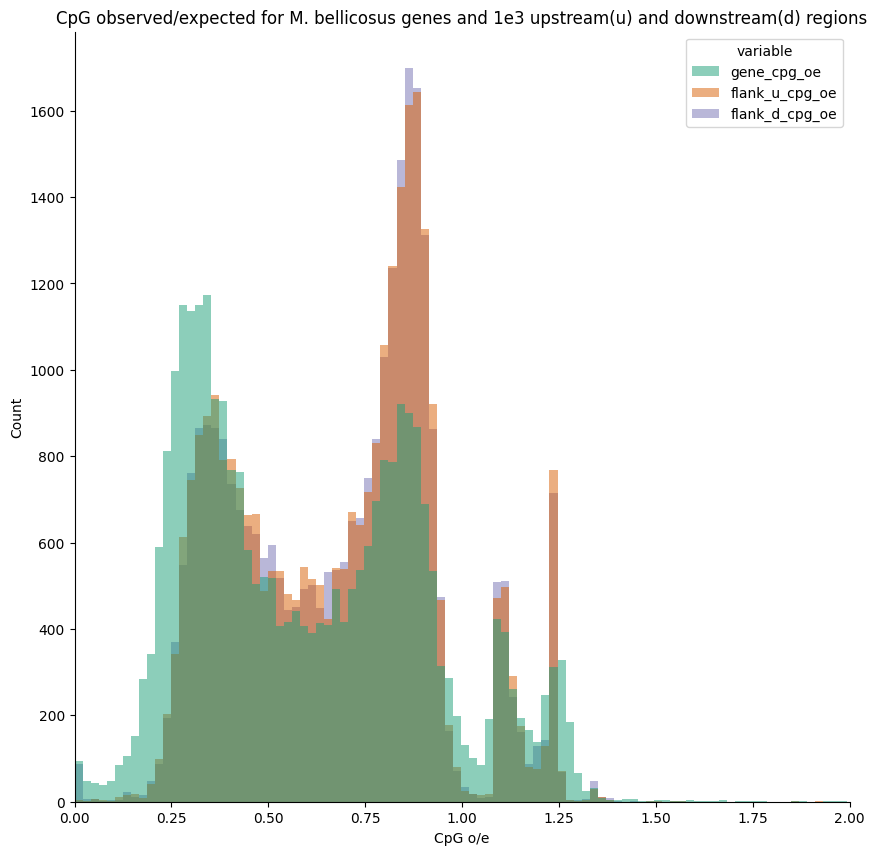

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
sns.histplot(data=cpg_chunks_df_melt_oe, x="value", hue="variable",linewidth=0, palette = ['#1b9e77','#d95f02','#7570b3'])

ax.set_xlim(0,2)
ax.set_title('CpG observed/expected for M. bellicosus genes and 1e3 upstream(u) and downstream(d) regions')
ax.set_xlabel('CpG o/e')

sns.despine()
plt.show()


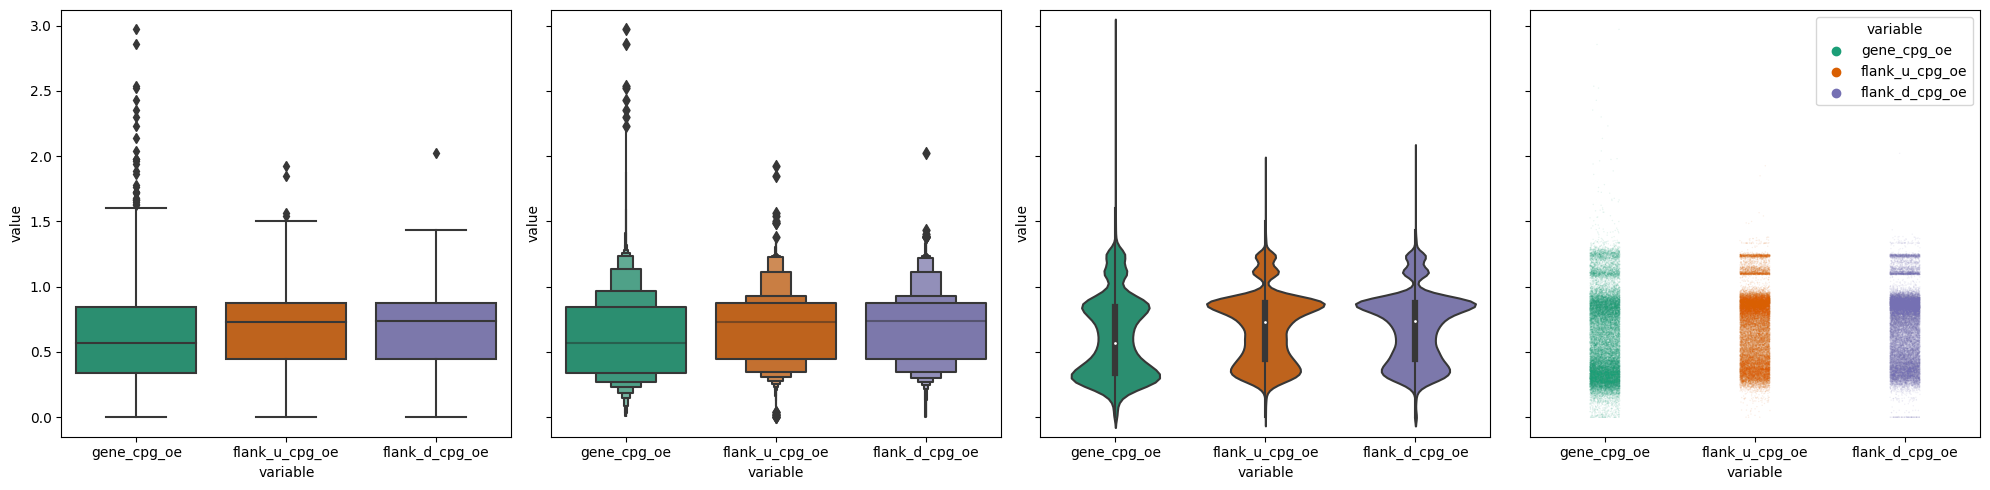

In [8]:
fig, (ax, ax1, ax2, ax3) = plt.subplots(ncols=4, nrows=1, figsize=(20,5), sharey=True, sharex=True)
sns.boxplot(data=cpg_chunks_df_melt_oe, y="value",x='variable', palette = ['#1b9e77','#d95f02','#7570b3'], ax=ax)
sns.boxenplot(data=cpg_chunks_df_melt_oe, y="value",x='variable', palette = ['#1b9e77','#d95f02','#7570b3'], ax=ax1)
sns.violinplot(data=cpg_chunks_df_melt_oe, y="value",x='variable', palette = ['#1b9e77','#d95f02','#7570b3'], ax=ax2)
sns.stripplot(data=cpg_chunks_df_melt_oe, y="value",x='variable', hue='variable', palette = ['#1b9e77','#d95f02','#7570b3'], ax=ax3, alpha=0.1, s=1)

plt.tight_layout()
plt.show()

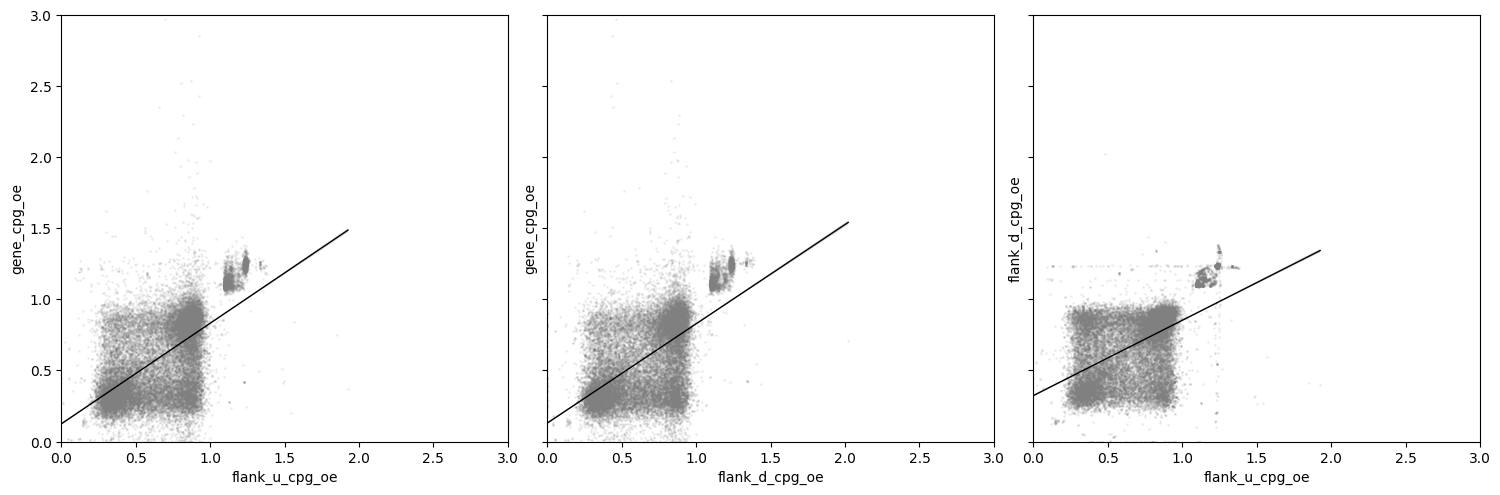

In [9]:
fig, (ax, ax1, ax2) = plt.subplots(ncols=3, nrows=1, figsize=(15,5), sharey=True, sharex=True)

sns.regplot(data=cpg_chunks_df, x="flank_u_cpg_oe", y="gene_cpg_oe", ax=ax, line_kws={'color':'black', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'grey'} )
sns.regplot(data=cpg_chunks_df, x="flank_d_cpg_oe", y="gene_cpg_oe", ax=ax1, line_kws={'color':'black', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'grey'} )
sns.regplot(data=cpg_chunks_df, x="flank_u_cpg_oe", y="flank_d_cpg_oe", ax=ax2, line_kws={'color':'black', 'linewidth':1}, scatter_kws={'s':1, 'alpha':0.1, 'color':'grey'} )

plt.tight_layout()
ax.set_ylim(0,3)
ax.set_xlim(0,3)

plt.show()

,Unnamed: 0,ID,gene_cpg_e,gene_cpg_o,gene_cpg_oe,gene_id,reg_id
0,0,g22731.t1.intron6,21.374046,0,0.000000,g22731.t1,intron6
1,1,g22731.t1.CDS7,16.271186,6,0.368750,g22731.t1,CDS7
2,2,g22731.t1.exon7,16.271186,6,0.368750,g22731.t1,exon7
3,3,g22731.t1.intron7,37.698344,5,0.132632,g22731.t1,intron7
4,4,g22731.t1.CDS8,17.885350,6,0.335470,g22731.t1,CDS8
...,...,...,...,...,...,...,...
827904,4135,g10458.t1.CDS3,8.888889,6,0.675000,g10458.t1,CDS3
827905,4136,g10458.t1.exon3,8.888889,6,0.675000,g10458.t1,exon3
827906,4137,g10458.t1.intron3,58.456164,18,0.307923,g10458.t1,intron3
827907,4138,g10458.t1.CDS4,3.781818,2,0.528846,g10458.t1,CDS4


In [20]:
cpg_chunks_exin_df_onlyexin = cpg_chunks_exin_df.loc[cpg_chunks_exin_df.reg_type.isin(['exon', 'intron'])]
cpg_chunks_exin_df_onlyexin.groupby('reg_type')['gene_cpg_oe'].mean()

reg_type
exon      0.564167
intron    0.482606
Name: gene_cpg_oe, dtype: float64

In [21]:
cpg_chunks_exin_df_onlyexin.groupby('reg_type')['gene_cpg_oe'].sem()

reg_type
exon      0.000850
intron    0.000768
Name: gene_cpg_oe, dtype: float64

In [22]:
cpg_chunks_exin_df_onlyexin.groupby('reg_type')['gene_cpg_oe'].std()

reg_type
exon      0.438275
intron    0.372242
Name: gene_cpg_oe, dtype: float64

In [23]:
cpg_chunks_df_melt.groupby('variable')['value'].mean()

variable
flank_d_cpg_e     2359.899680
flank_d_cpg_o     1832.578890
flank_d_cpg_oe       0.687312
flank_u_cpg_e     2517.649043
flank_u_cpg_o     1940.262923
flank_u_cpg_oe       0.686788
gene_cpg_e         955.367334
gene_cpg_o         558.520832
gene_cpg_oe          0.610369
Name: value, dtype: float64

In [24]:
cpg_chunks_df_melt.groupby('variable')['value'].sem()

variable
flank_d_cpg_e      7.265377
flank_d_cpg_o     10.336996
flank_d_cpg_oe     0.001529
flank_u_cpg_e     32.743299
flank_u_cpg_o     25.460435
flank_u_cpg_oe     0.001519
gene_cpg_e         7.809463
gene_cpg_o         5.355798
gene_cpg_oe        0.001800
Name: value, dtype: float64

In [25]:
cpg_chunks_df_melt.groupby('variable')['value'].std()

variable
flank_d_cpg_e     1248.334732
flank_d_cpg_o     1776.099347
flank_d_cpg_oe       0.262674
flank_u_cpg_e     5625.942935
flank_u_cpg_o     4374.603604
flank_u_cpg_oe       0.260958
gene_cpg_e        1341.819299
gene_cpg_o         920.231526
gene_cpg_oe          0.309197
Name: value, dtype: float64

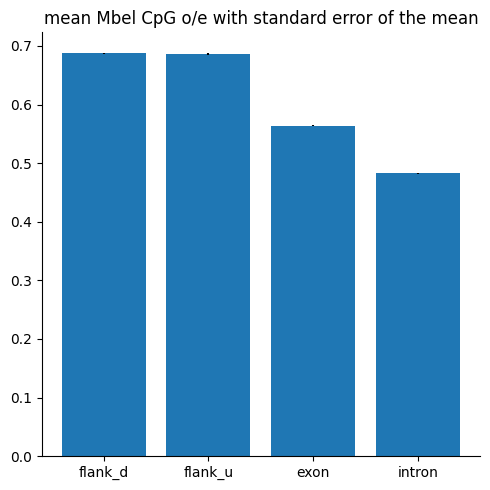

In [29]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5,5), sharey=True)
ax.bar(height = [0.687312,0.686788, 0.564167,0.482606 ], x=['flank_d', 'flank_u', 'exon', 'intron'], yerr = [0.001529,0.001519,0.000850,0.000768])
#ax1.bar(height = [0.670841,0.675701, 0.564167,0.482606 ], x= ['flank_d', 'flank_u', 'exon', 'intron'], yerr = [0.362396,0.362441,0.438275,0.372242])

ax.set_title("mean Mbel CpG o/e with standard error of the mean")
#ax1.set_title("mean CpG o/e with standard deviation")
sns.despine()
plt.tight_layout()
plt.show()

In [30]:
fd = cpg_chunks_df_melt.loc[cpg_chunks_df_melt.variable =='flank_d_cpg_oe' ]['value']
fu = cpg_chunks_df_melt.loc[cpg_chunks_df_melt.variable =='flank_u_cpg_oe' ]['value']
ex = cpg_chunks_exin_df.loc[cpg_chunks_exin_df.reg_type =='exon']['gene_cpg_oe']
intr = cpg_chunks_exin_df.loc[cpg_chunks_exin_df.reg_type =='intron']['gene_cpg_oe']

In [31]:
thsd = scipy.stats.tukey_hsd(fd, fu, ex, intr)

In [33]:
print(thsd)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.001     0.999    -0.008     0.009
 (0 - 2)      0.123     0.000     0.117     0.129
 (0 - 3)      0.205     0.000     0.198     0.211
 (1 - 0)     -0.001     0.999    -0.009     0.008
 (1 - 2)      0.123     0.000     0.116     0.129
 (1 - 3)      0.204     0.000     0.198     0.210
 (2 - 0)     -0.123     0.000    -0.129    -0.117
 (2 - 1)     -0.123     0.000    -0.129    -0.116
 (2 - 3)      0.082     0.000     0.079     0.084
 (3 - 0)     -0.205     0.000    -0.211    -0.198
 (3 - 1)     -0.204     0.000    -0.210    -0.198
 (3 - 2)     -0.082     0.000    -0.084    -0.079



# Csec - DE

In [20]:
DE_data = pd.read_csv('./Csec/DE_data/Queen_up_v_worker.tsv', comment='#', sep='\t')
DE_data.log2FoldChange = [ float(i.replace(',', '.')) for i in DE_data.log2FoldChange]
DE_data['worker_biased'] = DE_data.log2FoldChange>0
DE_data['queen_biased'] = DE_data.log2FoldChange<0

In [21]:
DE_data

,geneNumber,Csec_geneName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,worker_biased,queen_biased
0,gene10017,Csec_G08529,"1056,628089",0.616001,"0,215737574","2,855324345","0,00429929","0,03675582",True,False
1,gene10046,Csec_G08558,"541,1049239",-0.985723,"0,275781789","-3,574284997","0,000351186","0,00561372",False,True
2,gene10051,Csec_G10175,"279,3714062",1.001688,"0,289262032","3,462908882","0,000534369","0,007645203",True,False
3,gene10066,Csec_G10405,"1574,561655",-0.539845,"0,150668754","-3,582990708","0,000339683","0,005480346",False,True
4,gene10072,Csec_G10411,"2004,832621",0.622372,"0,192754699","3,228826998","0,001242991","0,014529482",True,False
...,...,...,...,...,...,...,...,...,...,...
1806,gene9946,Csec_G05159,"321,2825781",-2.667403,"0,417308745","-6,391916249","1,64E-10","2,19E-08",False,True
1807,gene9959,Csec_G05306,"2276,550495",-0.193438,"0,065984822","-2,931559336","0,003372649","0,030766278",False,True
1808,gene9970,Csec_G05317,"1725,099458",-1.005759,"0,338565057","-2,970651299","0,00297169","0,027972996",False,True
1809,gene9985,Csec_G06487,"1742,372414",0.401262,"0,104217725","3,850227978","0,000118008","0,002319207",True,False
